# Seattle Airbnb Price Analysis

# 1. Business Understanding

The aim of this project is understanding Airbnb pricing trends in Seattle by asking the following questions:

Is there a pattern of seasonality reflected in the prices?
Are prices neighbourhood dependent?
Can we see differences in price in relation to property type?

The following kaggle dataset will be used in the analysis:  https://www.kaggle.com/airbnb/seattle which contains the following files:

- Calendar.csv
- Listings.csv
- Reviews.csv 

# 2. Data Understanding

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import seaborn as sns


## i. Calendar Dataset

In [2]:
# Read in the calendar dataset
df_calendar = pd.read_csv('./data/archive/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_calendar.shape

(1393570, 4)

In [4]:
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

The price column has 459028 null values out of total entries 1393570. 

In [6]:
df_calendar.describe(include='all') 

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-07-01,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


In [7]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

### Findings

The date column needs to be converted to date object type and and the price column to float type for this analysis.

## ii. Listings Dataset

In [17]:
# Read in the listings dataset
df_listings = pd.read_csv('./data/archive/listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [18]:
df_listings.shape

(3818, 92)

In [19]:
df_listings.isnull().sum() 

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [21]:
df_listings.describe() 

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [22]:
df_listings.dtypes 

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

Findings 

In [23]:
df_listings.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Findings

Price column needs to be converted to a float data type. 

# 3. Data Preparation

### i. Calendar Dataset

In [8]:
# Convert price column to float data type. 
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

In [9]:
# Convert date column to datetime.
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [10]:
# Confirm data types converted as expected.
df_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [11]:
# Retrieve month from date to be used in seasonality price analysis. 
# source: https://stackoverflow.com/questions/51102615/get-month-from-date-column
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,t,85.0,1
1,241032,2016-01-05,t,85.0,1
2,241032,2016-01-06,f,NaN,1
3,241032,2016-01-07,f,NaN,1
4,241032,2016-01-08,f,NaN,1


### ii. Listings Dataset

In [24]:
# Convert price column to float data type. 
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)
# Check data type converted as expected.
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

# 4. Analysis

## Question 1: Is there a pattern of seasonality reflected in the prices?

In [12]:
# Calculate average price by month
monthly_average_price = df_calendar.groupby(['month'])['price'].mean()

Text(0.5, 1.0, 'Average Monthly Price')

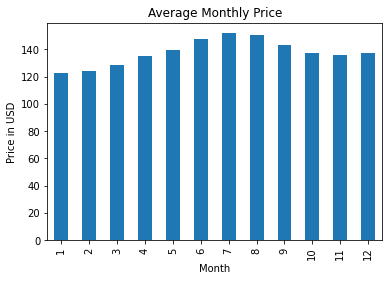

In [16]:
# Plot average price by month
monthly_average_price.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Price in USD")
plt.title("Average Monthly Price")

### Findings

The average price peaks during the summer months. 

## Question 2: Are prices neighbourhood dependent?

In [26]:
# Calculate average price by neighbourhood.
neighbourhood_average_price = df_listings.groupby(['neighbourhood'])['price'].mean()
neighbourhood_average_price

neighbourhood
Alki              196.652174
Arbor Heights     118.000000
Atlantic          116.280000
Ballard           123.615023
Belltown          166.627451
                     ...    
Wallingford       131.335664
Wedgewood         106.666667
Westlake          197.000000
Windermere        174.700000
Yesler Terrace    141.083333
Name: price, Length: 81, dtype: float64

Text(0.5, 1.0, '20 Most Expensive Neighbourhoods')

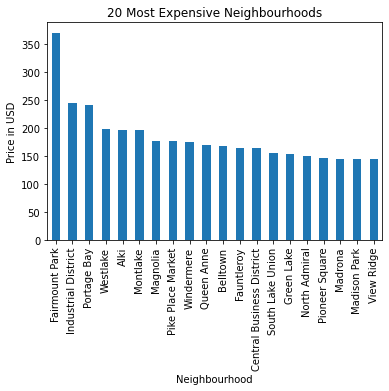

In [57]:
# Plot the 20 most expensive neighbourhoods. 
top_20_expensive_neighbourhoods = neighbourhood_average_price.sort_values(ascending=False).head(20).plot(kind='bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Price in USD")
plt.title("20 Most Expensive Neighbourhoods")

Text(0.5, 1.0, '20 Least Expensive Neighbourhoods')

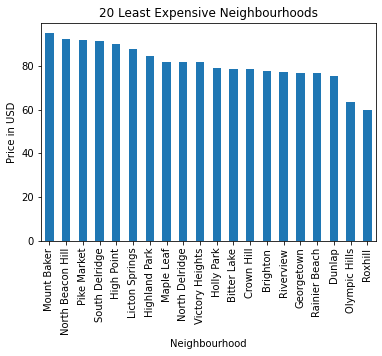

In [56]:
# Plot the 20 least expensive neighbourhoods. 
bottom_20_expensive_neighbourhoods = neighbourhood_average_price.sort_values(ascending=False).tail(20).plot(kind='bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Price in USD")
plt.title("20 Least Expensive Neighbourhoods")

### Findings

There is a price differential in neighbourhoods. 

## Question 2: Are there differences in price in relation to property type?

In [30]:
# Calculate average price by property type.
property_type_average_price = df_listings.groupby(['property_type'])['price'].mean()
property_type_average_price

property_type
Apartment          122.932670
Bed & Breakfast    112.054054
Boat               282.375000
Bungalow           115.615385
Cabin              104.666667
Camper/RV          120.461538
Chalet              98.500000
Condominium        151.109890
Dorm                39.500000
House              132.351414
Loft               135.700000
Other               94.681818
Tent                54.000000
Townhouse          129.457627
Treehouse          101.000000
Yurt               100.000000
Name: price, dtype: float64

In [31]:
# Calculate average price by room type.
room_type_average_price = df_listings.groupby(['room_type'])['price'].mean()
room_type_average_price

room_type
Entire home/apt    155.843369
Private room        75.044828
Shared room         47.547009
Name: price, dtype: float64

Text(0.5, 1.0, 'Average Price by Property Type')

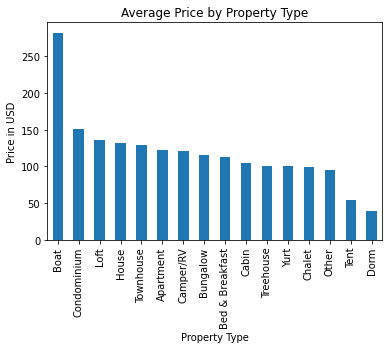

In [41]:
# Plot average price by room type.
property_type_average_price.sort_values(ascending=False).plot(kind='bar')
plt.xlabel("Property Type")
plt.ylabel("Price in USD")
plt.title("Average Price by Property Type")

Text(0.5, 1.0, 'Average Price by Room Type')

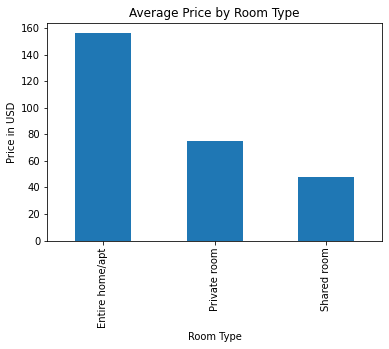

In [42]:
# Plot average price by room type. 
room_type_average_price.plot(kind='bar')
plt.xlabel("Room Type")
plt.ylabel("Price in USD")
plt.title("Average Price by Room Type")

### Findings 

Price varies by room and property type with boat and condominium as the most expensvive for property type and entire home as most expensive for room type. 